<a href="https://colab.research.google.com/github/jrangelg/TimeSeries/blob/master/Fractional_Brownian_motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# American option pricing by the stochastic mesh method under Fractional Brownian movement of the underlying asset

Daniel Aragón Urrego

## Students

- George Plata

- Jhonier Rangel Gutiérrez


## Objectives
- We will present the main definitions and results of the Brownian Fractional Movement (MBI) and the way in which its incorporation in the stochastic mesh method allows the valuation of American call and put options to be presented.

- According to the results obtained, the premium of the American option has a tendency to decrease when the behavior of the price of the underlying asset is persistent or has a long-term memory.

- It is observed that the price of the option tends to decrease as the value of the Hurst coefficient approaches 1, moving away from the estimates made by Geometric Brownian Movement (MBG).

- Discuss some problems to solve with the Hurst coefficient in some stochastic differential equations and classical variations of Brownian motion


  # Models with brownian motion.
   This motion is named after the botanist Robert Brown, who first described the phenomenon in 1827, while looking through a microscope at pollen of the plant Clarkia pulchella immersed in water. In 1905, almost eighty years later, theoretical physicist Albert Einstein published a paper where he modeled the motion of the pollen particles as being moved by individual water molecules, making one of his first major scientific contributions. Albert Einstein said the movement fulfilled the following:

- that is a continuous movement.
-It appears to have independent displacements in
- those displacements are modeled with a Gaussian distribution.


**Definition**.

A Stochastic differential equation has a continuous time stochastic process as solution that satisfies the next expression
    \begin{equation*}
\begin{split}
dX_t = \mu(X_t, t)dt+ \sigma(X_t,t)dB_t\\
X_T = X_0 + \int_0^T\mu(X_t, t)dt + \int_0^T\sigma(X_t, t)dB_t
\end{split}
\end{equation*}
But a time series model is a stochastic process in discrete time that satisfies a Stochastic equation in finite differences, for example, an ARMA(p,q) process satisfies
    \begin{equation*}
\begin{split}
X_T = X_0 + \sum_{I=T-p}^Ta_tX_t + \sum_{i=T-q}^T b_t Z_t
\end{split}
\end{equation*}

**Definition**

  Fractional Brownian Motion (fBm) with Hurst parameter $H \in (0,1)$ is a Gaussian stochastic process $B_H = \{B_H(t), t \geq 0\}$ with mean zero and covariance function given by
- $B_H(0) =0$
- $\mathbb{E}[B_H(t)] = 0 $
- Stationary increments
- $\mathbb{E}[B_H(t)B_H(s)] = \frac{1}{2} \big[ |t|^{2H} + |s|^{2H} - |t-s|^{2H} \big]
$

# How to simulate a fractional brownian motion?

## Black Noise H=1/6

In [ ]:
#################################
#                               #
#                               #
#       Black Noise H=1/6       #
#                               #
#                               #
#################################
# H=1/6
I=0#Initial point
F=1#Final point
H<-1/6
sig<-1
N<-1000
dt<-(F-I)/N
t<-seq(I,F,length=N)#Domain
C<-matrix(0,N-1,N-1)
for (i in 2:N) {
  for (j in 2:N) {
   C[i-1,j-1] <- (1/2)*((abs(t[i])^(2*H) + abs(t[j])^(2*H) - abs(t[i]-t[j])^(2*H)))
  }
}
C[1:5,1:5]

0.10003336,0.06301707,0.05913614,0.05727667,0.05614747
0.06301707,0.12603413,0.08513692,0.07939653,0.07640785
0.05913614,0.08513692,0.14427306,0.10151638,0.09464678
0.05727667,0.07939653,0.10151638,0.15879305,0.11490717
0.05614747,0.07640785,0.09464678,0.11490717,0.17105463


[1] 0.017175598 0.006468429 0.011919383 0.006616550 0.014357401

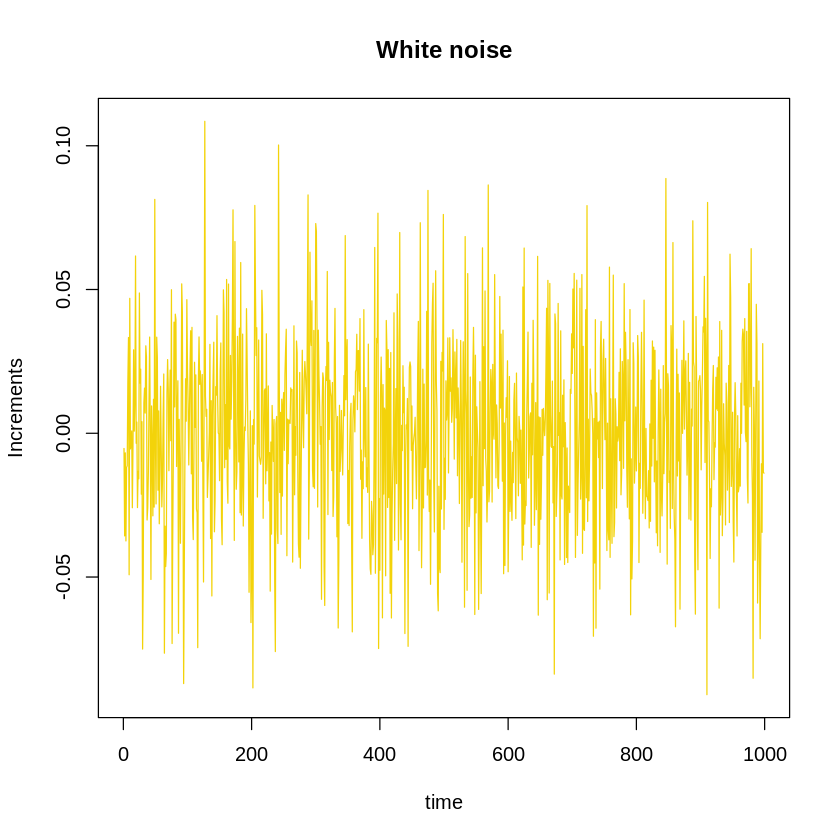

In [ ]:
########################
# generate Motion      #
########################

z<-rnorm(N-1,0,sig*sqrt(dt))
plot(z,type = "l",main="White noise",col="#F3D30A",
     xlab="time",ylab = "Increments")
BH<-chol(C)%*%z
BH[1:5]



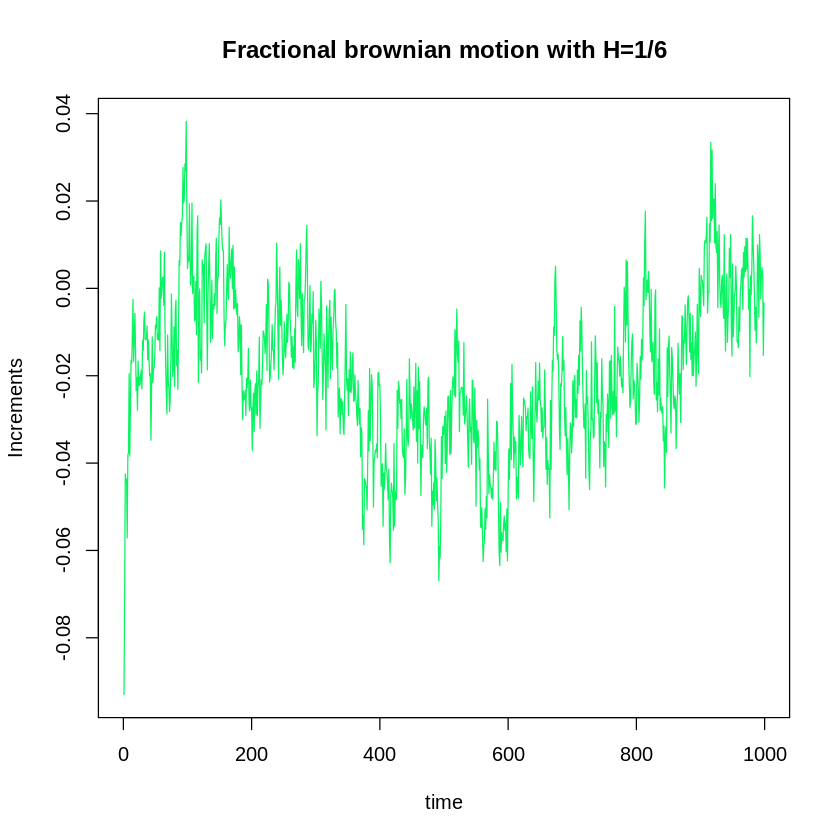

In [ ]:
# Fractional brownian motion with H=1/6
plot(BH,type = "l",main="Fractional brownian motion with H=1/6",col="#0AF362",
     xlab="time",ylab = "Increments")

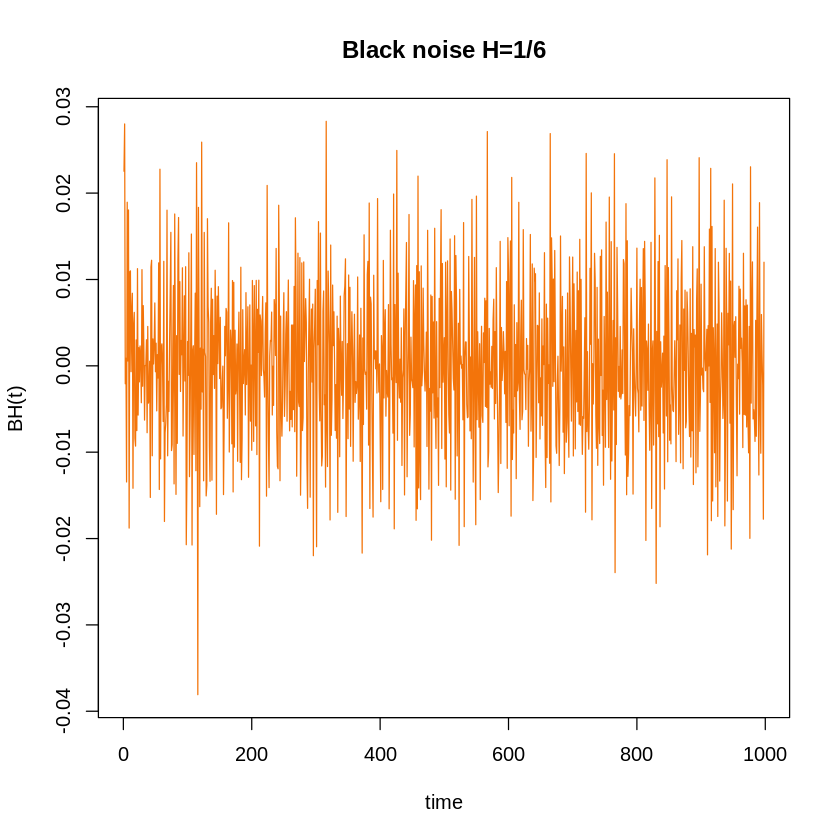

In [ ]:
w<-diff(BH)
plot(w,type = "l",main="Black noise H=1/6"
     ,col="#F3740A",xlab="time",ylab = "BH(t)")

# Pink noise H=3/4

In [ ]:
#################################
#                               #
#                               #
#       Pink Noise H=3/4       #
#                               #
#                               #
#################################

# H=3/4
I=0#Initial point
F=1#Final point
H<-3/4
sig<-1
N<-1000
dt<-(F-I)/N
t<-seq(I,F,length=N)#Domain
C<-matrix(0,N-1,N-1)
for (i in 2:N) {
  for (j in 2:N) {
    C[i-1,j-1] <- (1/2)*((abs(t[i])^(2*H) + abs(t[j])^(2*H) - abs(t[i]-t[j])^(2*H)))
  }
}
C[1:5,1:5]


3.167027e-05,4.478853e-05,5.332838e-05,6.023444e-05,6.619625e-05
4.478853e-05,8.957705e-05,1.112352e-04,1.266811e-04,1.395489e-04
5.332838e-05,1.112352e-04,1.645636e-04,1.931277e-04,2.145354e-04
6.023444e-05,1.266811e-04,1.931277e-04,2.533622e-04,2.878881e-04
6.619625e-05,1.395489e-04,2.145354e-04,2.878881e-04,3.540844e-04


[1] 0.010393491 0.007264900 0.006743243 0.006487697 0.006452166

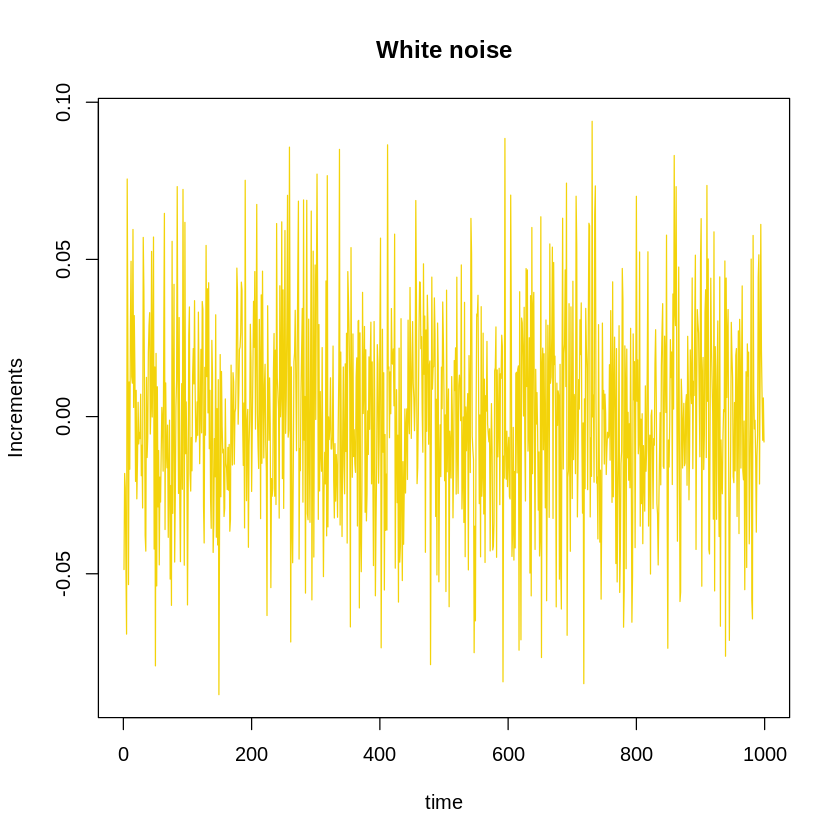

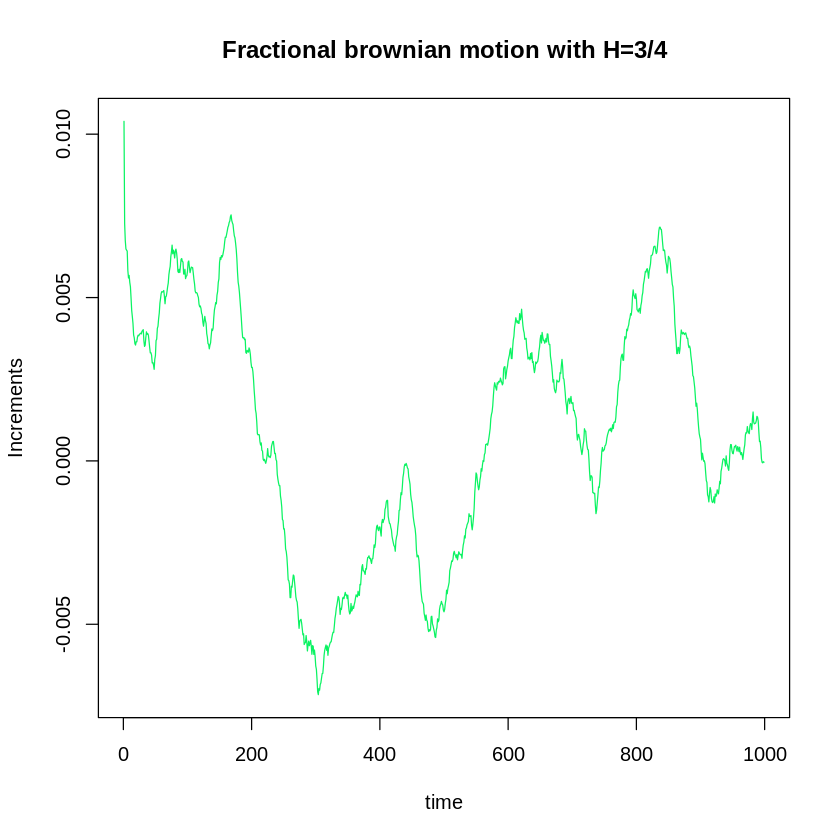

In [ ]:
########################
# generate Motion      #
########################

z<-rnorm(N-1,0,sig*sqrt(dt))
plot(z,type = "l",main="White noise",col="#F3D30A",
     xlab="time",ylab = "Increments")
BH<-chol(C)%*%z
BH[1:5]


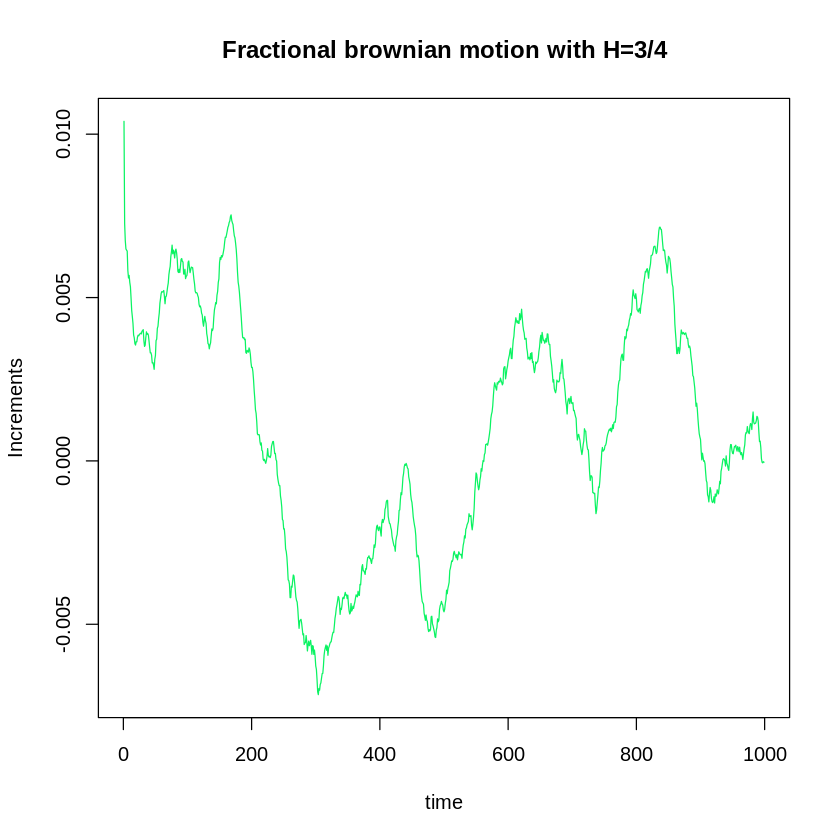

In [ ]:
plot(BH,type = "l",main="Fractional brownian motion with H=3/4",col="#0AF362",
     xlab="time",ylab = "Increments")

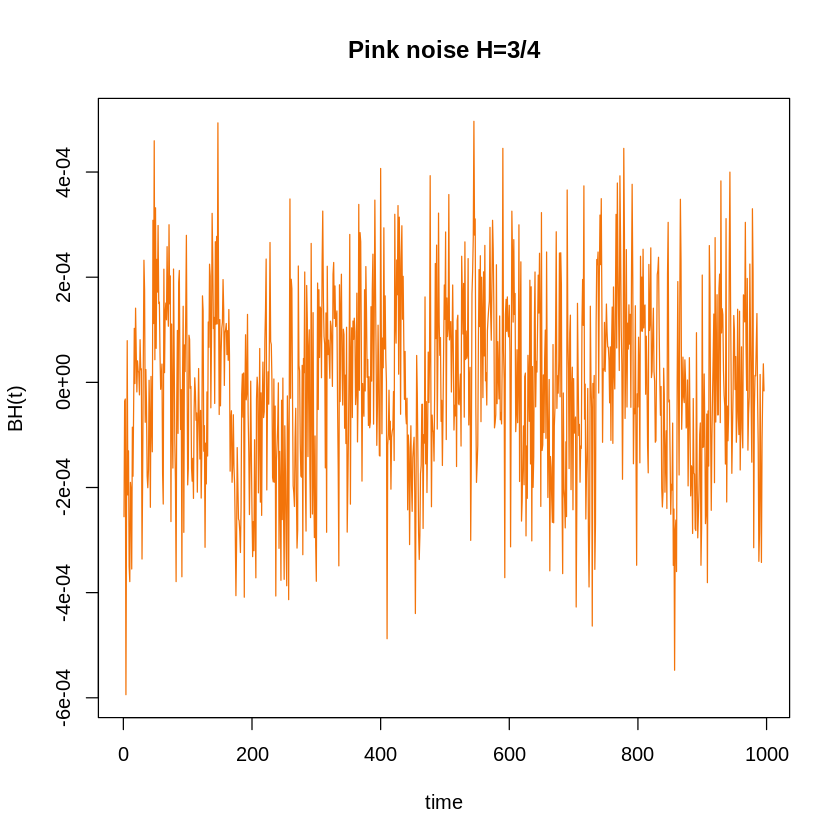

In [ ]:
# Fractional brownian motion with H=1/6

w<-diff(BH)
plot(w[-c(1:2)],type = "l",main="Pink noise H=3/4"
     ,col="#F3740A",xlab="time",ylab = "BH(t)")


## Withe Noise H=1/2

In [ ]:
#################################
#                               #
#                               #
#       Withe Noise H=1/2       #
#                               #
#                               #
#################################

# H=1/2
I=0#Initial point
F=1#Final point
H<-1/2
sig<-1
N<-1000
dt<-(F-I)/N
t<-seq(I,F,length=N)#Domain
C<-matrix(0,N-1,N-1)
for (i in 2:N) {
  for (j in 2:N) {
    C[i-1,j-1] <- (1/2)*((abs(t[i])^(2*H) + abs(t[j])^(2*H) - abs(t[i]-t[j])^(2*H)))
  }
}
C[1:5,1:5]

0.001001001,0.001001001,0.001001001,0.001001001,0.001001001
0.001001001,0.002002002,0.002002002,0.002002002,0.002002002
0.001001001,0.002002002,0.003003003,0.003003003,0.003003003
0.001001001,0.002002002,0.003003003,0.004004004,0.004004004
0.001001001,0.002002002,0.003003003,0.004004004,0.005005005


[1] 0.004960846 0.006914259 0.008297291 0.008166509 0.007436036

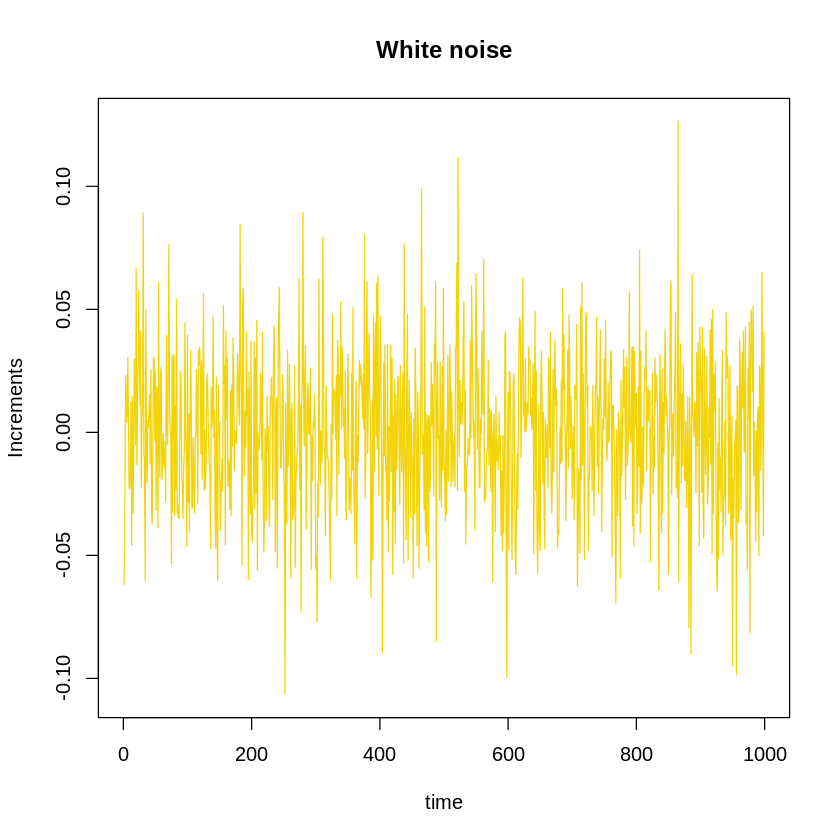

In [ ]:
########################
# generate Motion      #
########################

z<-rnorm(N-1,0,sig*sqrt(dt))
plot(z,type = "l",main="White noise",col="#F3D30A",
     xlab="time",ylab = "Increments")
BH<-chol(C)%*%z
BH[1:5]

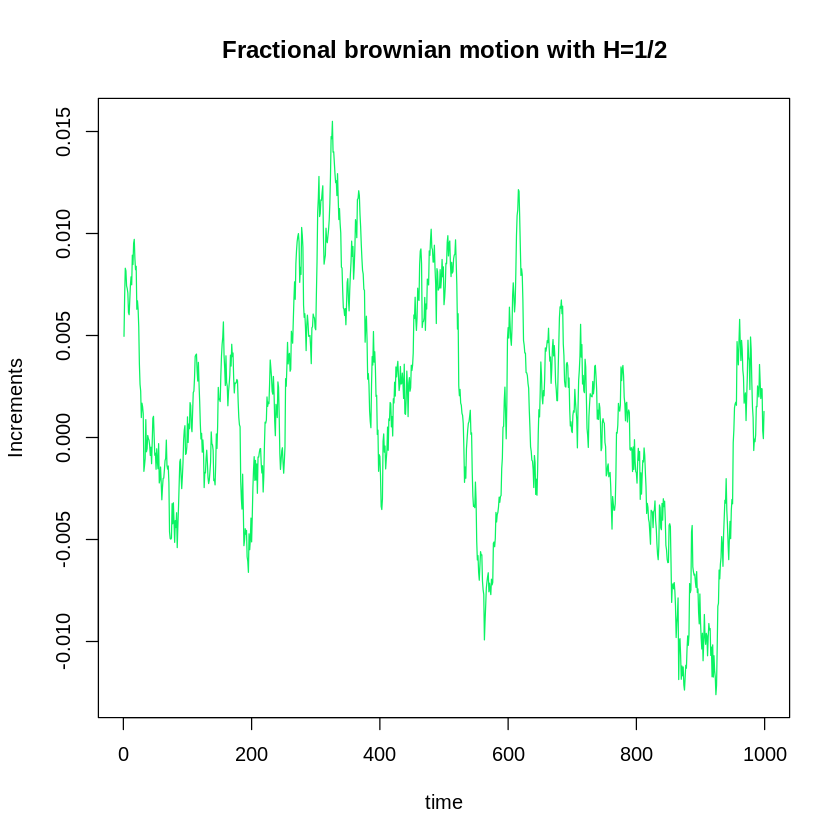

In [ ]:
plot(BH,type = "l",main="Fractional brownian motion with H=1/2",col="#0AF362",
     xlab="time",ylab = "Increments")

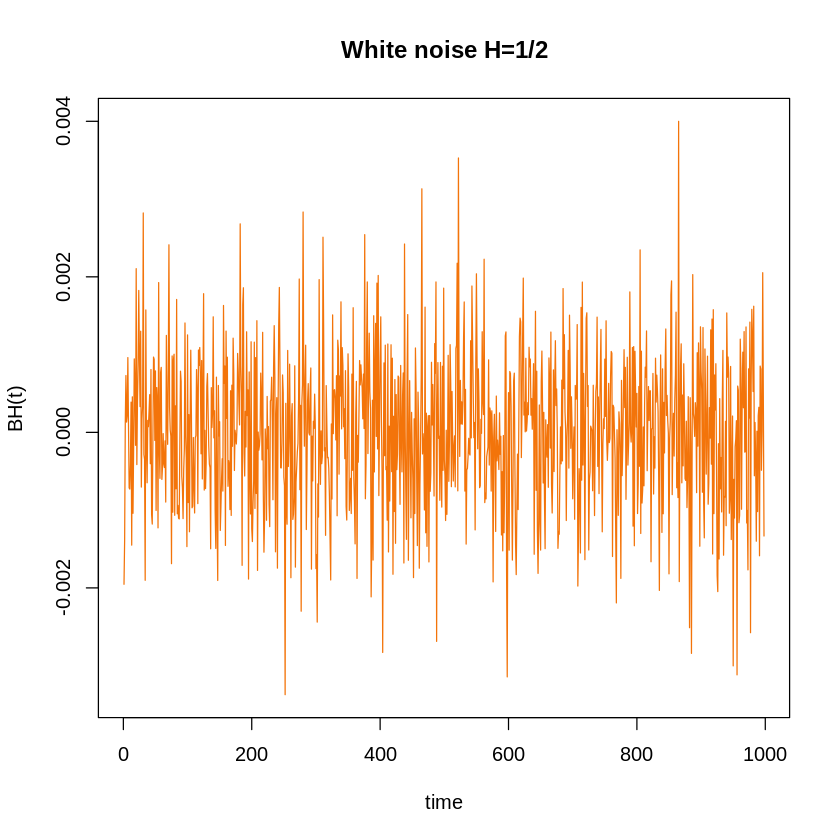

In [ ]:


w<-diff(BH)
plot(-w,type = "l",main="White noise H=1/2"
     ,col="#F3740A",xlab="time",ylab = "BH(t)")


# American option

In this case, we are talking about stochastic mesh that is modeled by many geometric brownian motions

Now we are discussing how to model a Fractional Geometric Brownian motion with different fractional parameters

We consider calssical ODE

$$
dx(t) = \mu * x(t)dt
$$

We can solve this for separable variables

$$
x(t)= x_0 \ e^{\mu t}
$$

Now we will see exponential growth as a random variable, so the equation that generalizes this modeling is the following:
\begin{equation*}
    dX_t = \mu X_t dt + \sigma X_t dBt
\end{equation*}
The second addend is used to balance the effect of the quadratic variation, giving us the following process as a result:
\begin{equation*}
    X_t = x_0 \ \text{exp}\left[ \left( \mu -\frac{1}{2}\sigma^2\right)t + \sigma B_t  \right].
\end{equation*}
Now let's show that it is a random generalization of classical exponential growth:
\begin{equation*}
    \begin{split}
        E(X_t) &= E \left( x_0 \ \text{exp}\left[ \left( \mu -\frac{1}{2}\sigma^2\right)t + \sigma B_t  \right] \right) \\
        &= x_0 \ \text{exp}\left[ \left( \mu -\frac{1}{2}\sigma^2\right)t \right]E \left( \text{exp}[\sigma B_t] \right) \\
        &= x_0 \ \text{exp}\left[ \left( \mu -\frac{1}{2}\sigma^2\right)t \right] \text{exp}\left[\frac{1}{2} t \sigma^2 \right] \\
        &= x_0 \ e^{\mu t}
    \end{split}
\end{equation*}

# H=1/2

0.01010101,0.01010101,0.01010101,0.01010101,0.01010101
0.01010101,0.02020202,0.02020202,0.02020202,0.02020202
0.01010101,0.02020202,0.03030303,0.03030303,0.03030303
0.01010101,0.02020202,0.03030303,0.04040404,0.04040404
0.01010101,0.02020202,0.03030303,0.04040404,0.05050505


[1] -0.1486900 -0.1555157 -0.1587813 -0.1658031 -0.1647186

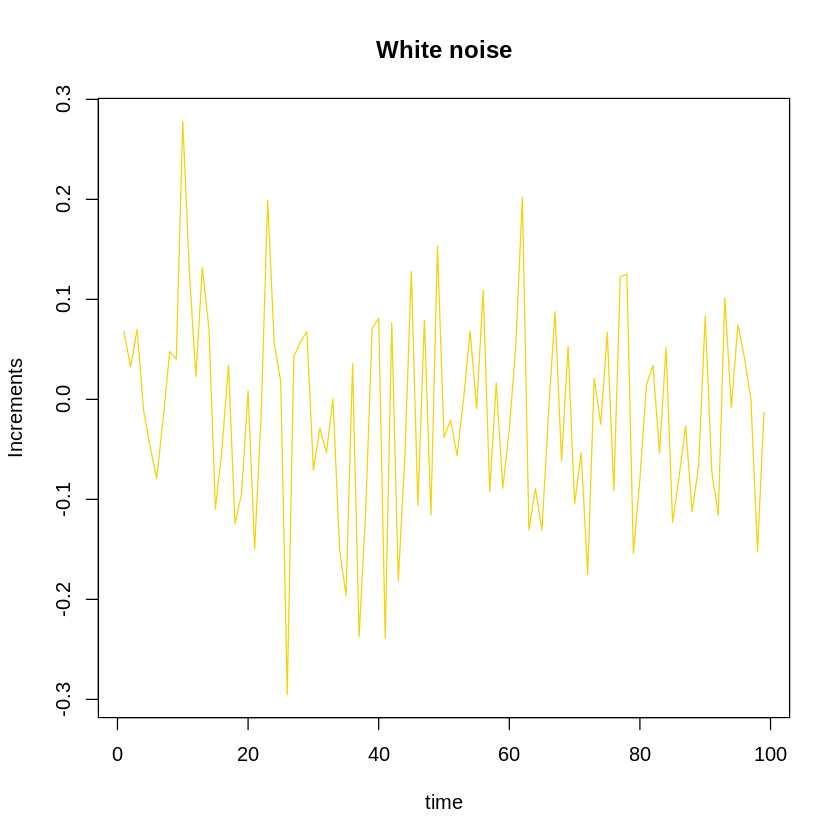

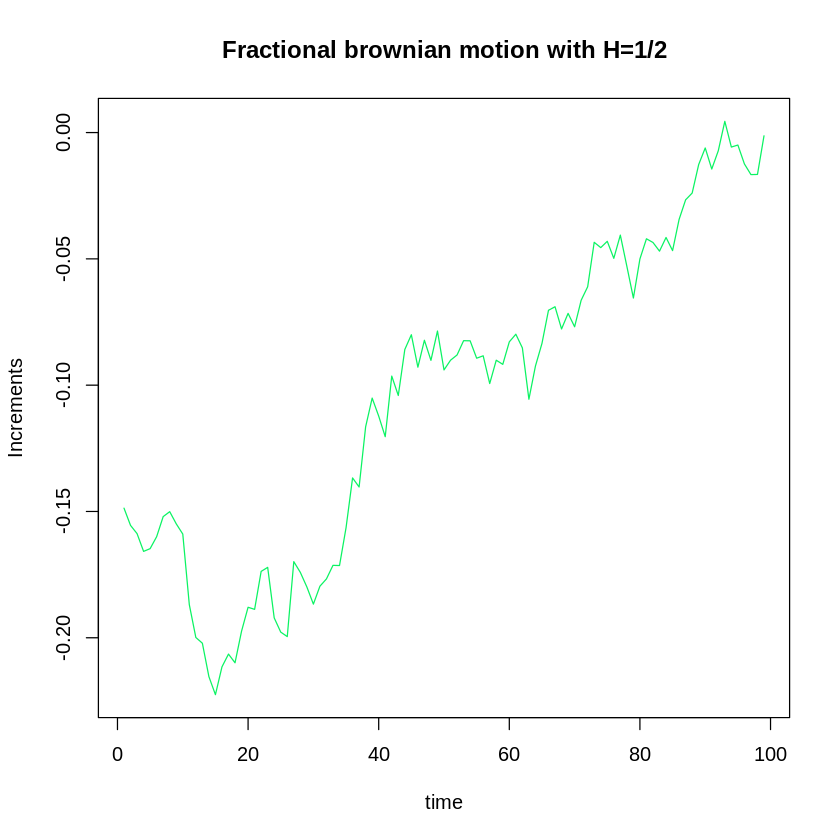

In [ ]:
# H=1/2
I=0#Initial point
F=1#Final point
H<-1/2
sig<-1
N<-100
dt<-(F-I)/N
t<-seq(I,F,length=N)#Domain
C<-matrix(0,N-1,N-1)
for (i in 2:N) {
  for (j in 2:N) {
    C[i-1,j-1] <- (1/2)*((abs(t[i])^(2*H) + abs(t[j])^(2*H) - abs(t[i]-t[j])^(2*H)))
  }
}
C[1:5,1:5]




########################
# generate Motion      #
########################

z<-rnorm(N-1,0,sig*sqrt(dt))
plot(z,type = "l",main="White noise",col="#F3D30A",
     xlab="time",ylab = "Increments")
BH<-chol(C)%*%z
BH[1:5]
plot(BH,type = "l",main="Fractional brownian motion with H=1/2",col="#0AF362",
     xlab="time",ylab = "Increments")



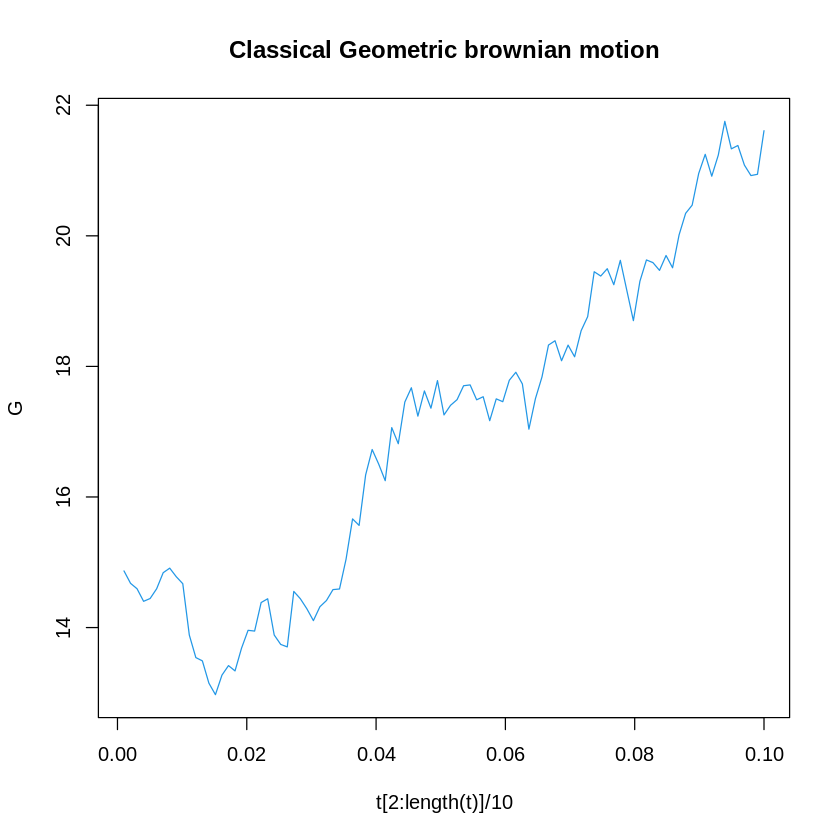

In [ ]:
mu=10
sig=2
x0=20
G<-x0*exp((mu-sig^2/2)*t[2:length(t)]/100 + sig*BH)
plot(t[2:length(t)]/10,G, type="l", col=4, main="Classical Geometric brownian motion")

# Goodness fit of the logarithmic returns


In [ ]:
shapiro.test(diff(log(G)))


	Shapiro-Wilk normality test

data:  diff(log(G))
W = 0.99329, p-value = 0.911


H=1/6

0.001607351,0.002120912,0.002424304,0.002659256,0.002856154
0.002120912,0.004241825,0.005058778,0.005597121,0.006028972
0.002424304,0.005058778,0.007483082,0.008534987,0.009270229
0.002659256,0.005597121,0.008534987,0.011194243,0.012443046
0.002856154,0.006028972,0.009270229,0.012443046,0.015299200


[1] 0.2801557 0.2346147 0.2212077 0.2206855 0.1973441

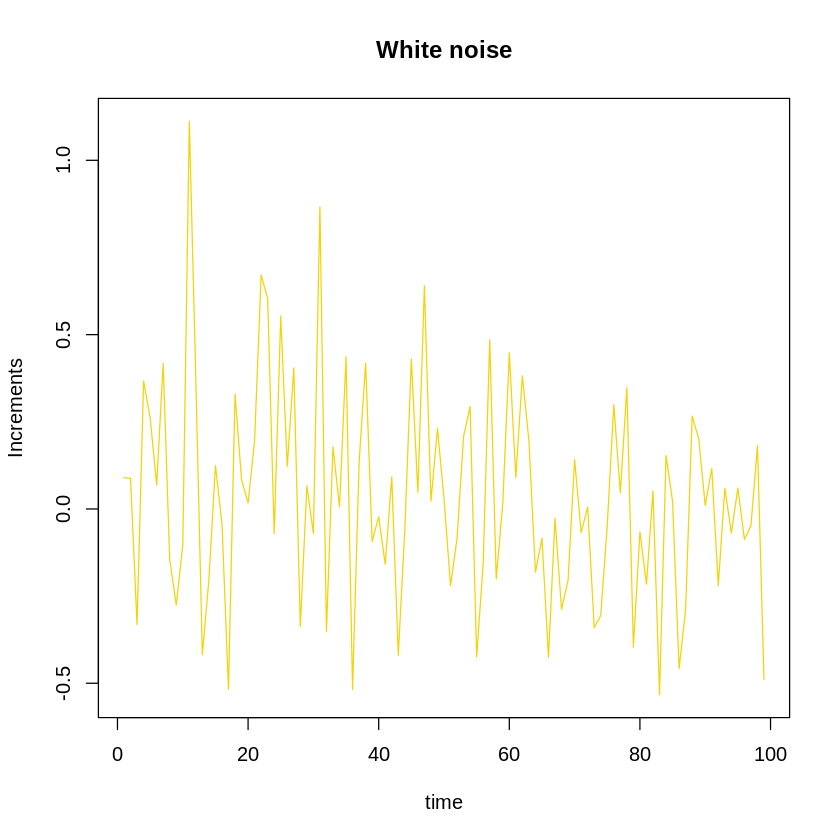

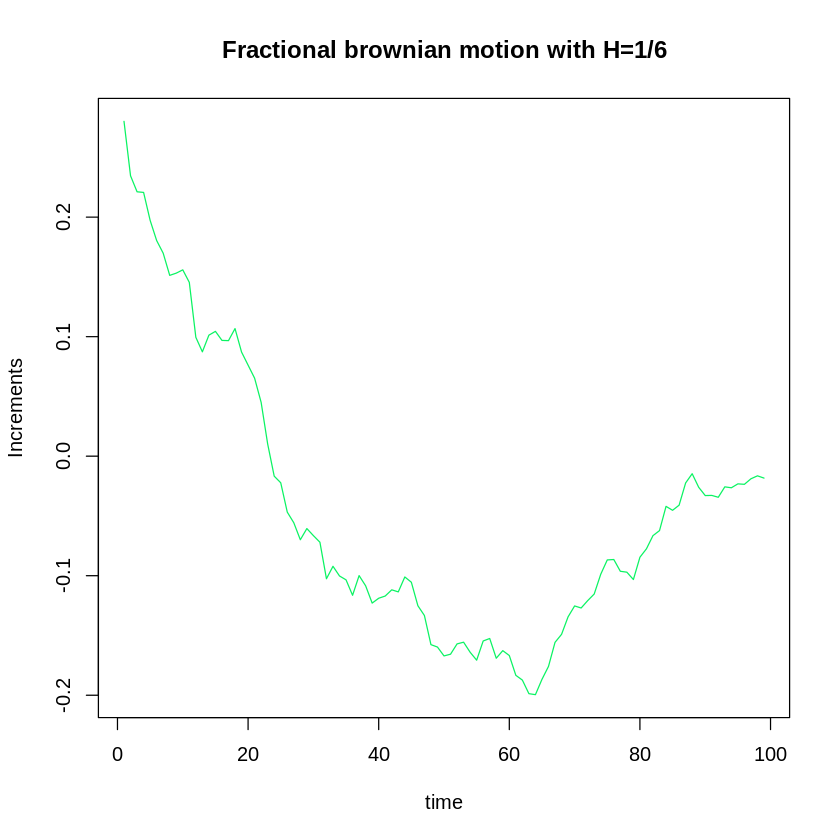

In [ ]:
#################################
#                               #
#                               #
#       Black Noise H=1/6       #
#                               #
#                               #
#################################
# H=1/6
I=0#Initial point
F=1#Final point
H<-0.7
sig<-3
N<-100
dt<-(F-I)/N
t<-seq(I,F,length=N)#Domain
C<-matrix(0,N-1,N-1)
for (i in 2:N) {
  for (j in 2:N) {
   C[i-1,j-1] <- (1/2)*((abs(t[i])^(2*H) + abs(t[j])^(2*H) - abs(t[i]-t[j])^(2*H)))
  }
}
C[1:5,1:5]




########################
# generate Motion      #
########################

z<-rnorm(N-1,0,sig*sqrt(dt))
plot(z,type = "l",main="White noise",col="#F3D30A",
     xlab="time",ylab = "Increments")
BH<-chol(C)%*%z
BH[1:5]
plot(BH,type = "l",main="Fractional brownian motion with H=1/6",col="#0AF362",
     xlab="time",ylab = "Increments")

# We can use it to solve this equation

There are two paths to solving this problem

- Solving the SDE with Malliavin Analysis

- With the Cholesky method for using general Euler Maruyama

In [ ]:
# Fractional Geometric
mu=10
sig=30
x0=20
GH<-NULL
GH[1]<-x0
dBH<-diff(BH)
for(i in 2:length(BH)){
  GH[i]<- GH[i-1]+mu*GH[i-1]/N+sig*GH[i-1]*dBH[i-1]
}



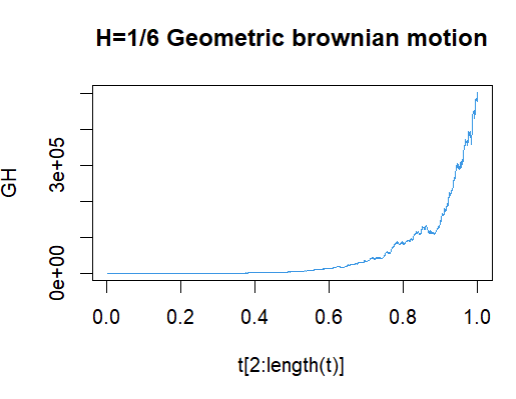

In [ ]:
install.packages("nortest")
library(nortest)
lillie.test(diff(log(solve(chol(C))%*%GH)))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in log(solve(chol(C)) %*% GH):
“NaNs produced”



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  diff(log(solve(chol(C)) %*% GH))
D = 0.10793, p-value = 0.2676


# When you have the brownian bridge you can generate a simulation about brownian fractional bridge.

   If $\{W_t^H: t \geq 0\}$ is a Fractional Wiener process (i.e., for t ≥ 0, $\{W_t^H: t \geq 0\}$ satifies the fractional conditions, then $\{W_t^H -\frac{t}{T}W_T^H: t \in [0,T]\}$ is the Fractional brownian bridge between $0$ and $T$

# Remember the classical brownian bridge

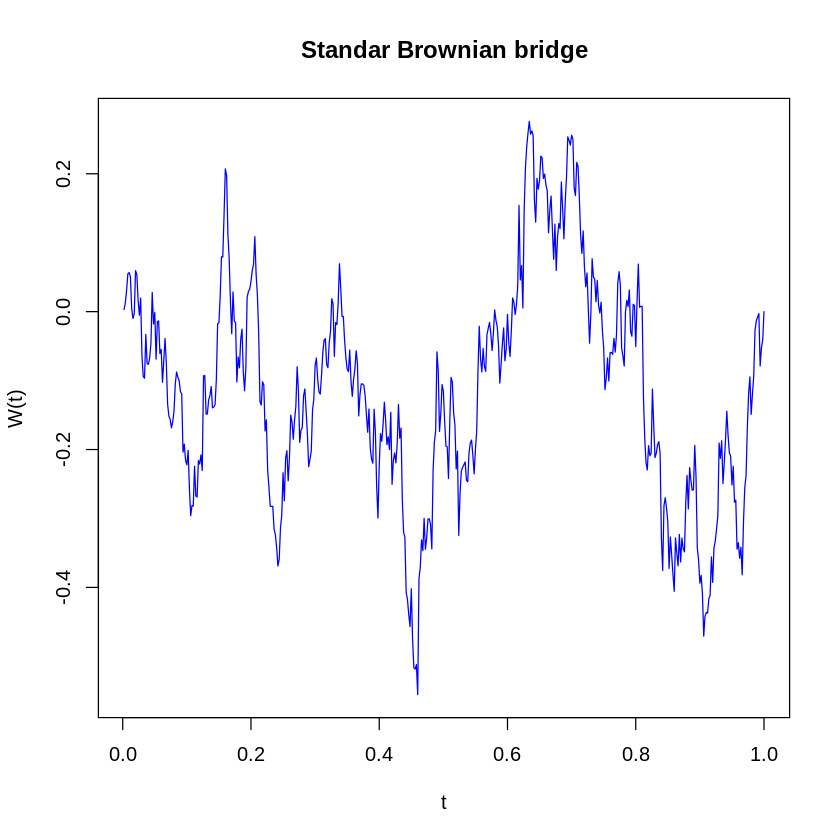

In [ ]:
#Brownian bridge moviment model.
#Movimiento Browniano
set.seed(200)
T=1
N=500
dt=T/N
dw=rnorm(N,0,sqrt(dt))
w=cumsum(dw)
t=seq(1/N,1,by=1/N)
b=w-(t/T)*w[N]
obj=plot(t,b,type="l", col = "blue",main="Standar Brownian bridge",xlab="t",ylab="W(t)")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in t * ind:
“longer object length is not a multiple of shorter object length”
Warning message in t * ind:
“longer object length is not a multiple of shorter object length”


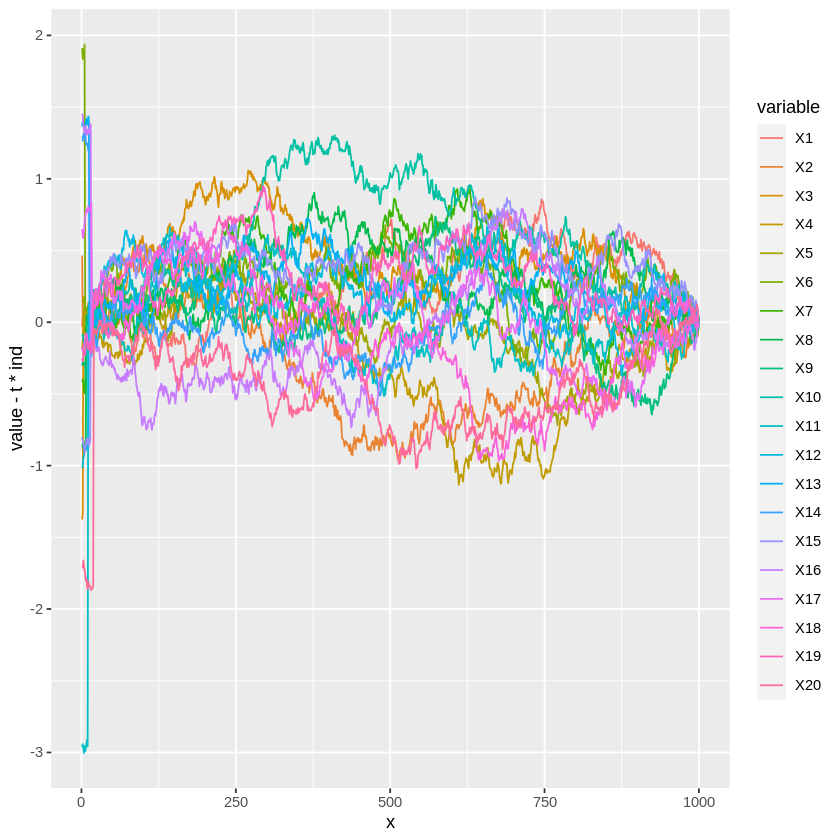

In [ ]:
# Movimiento browniano
set.seed(2)

# Grid
t <- seq(0, 1, by = 0.001)
p <- length(t) - 1

# 20 trayectorias
n <- 20
I <- matrix(rnorm(n * p, 0, 1 / sqrt(p)), n, p)

# Data frame
df1 <- data.frame(apply(I, 1, cumsum))

install.packages("reshape")
library(reshape)

df <- data.frame(x = seq_along(df1[, 1]),
                 df1)

# Formato long
df <- melt(df, id.vars = "x")

# install.packages("ggplot2")
library(ggplot2)
vf<-df$value[1000*(1:20)]
ind<-c()
for(i in 1:20){
  ind<-c(ind,rep(vf[i],1000))
}
ggplot(df, aes(x = x, y = value-t*ind, color = variable)) +
  geom_line()

# Fractional brownian bridge with H=1/6

[1] -0.01704785 -0.01063916 -0.01854575 -0.02551964 -0.02005348

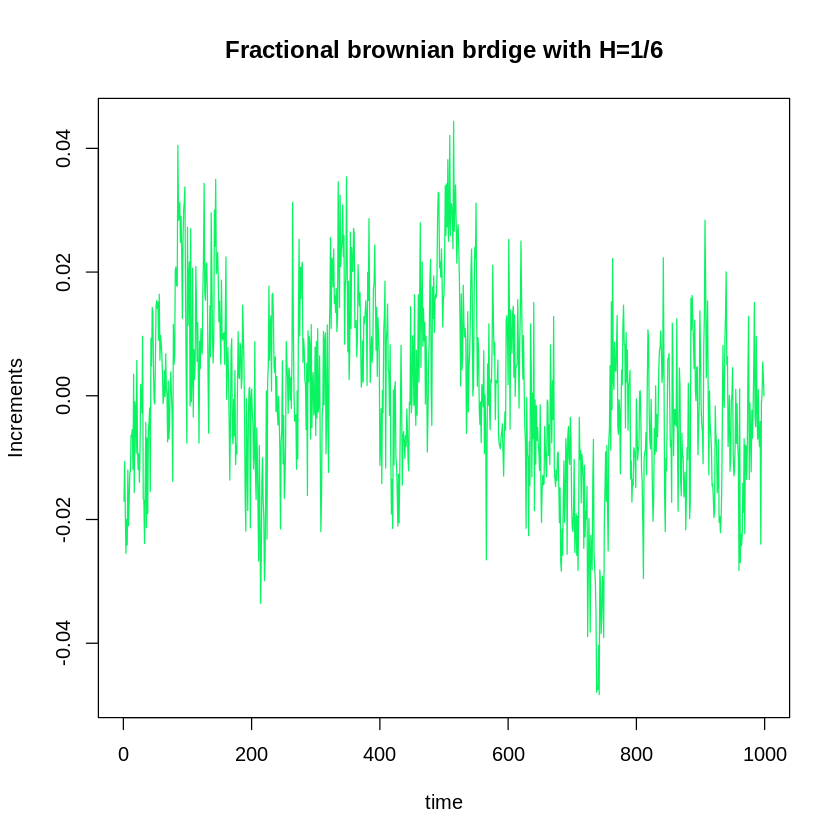

In [ ]:
#################################
#                               #
#                               #
#       Black Noise H=1/6       #
#         Bridge                #
#                               #
#                               #
#################################
# H=1/6
I=0#Initial point
F=1#Final point
H<-1/6
sig<-1
N<-1000
dt<-(F-I)/N
t<-seq(I,F,length=N)#Domain
C<-matrix(0,N-1,N-1)
for (i in 2:N) {
  for (j in 2:N) {
    C[i-1,j-1] <- (1/2)*((abs(t[i])^(2*H) + abs(t[j])^(2*H) - abs(t[i]-t[j])^(2*H)))
  }
}
########################
# generate Motion      #
########################

z<-rnorm(N-1,0,sig*sqrt(dt))
BH<-chol(C)%*%z
BH[1:5]
plot(BH-t[2:N-1]*BH[length(BH)],type = "l",main="Fractional brownian brdige with H=1/6",col="#0AF362",
     xlab="time",ylab = "Increments")


#   Trajectory behavior

Warning message in matrix(rnorm((n - 1) * p, 0, 1/sqrt(p)), n, p):
“data length [18981] is not a sub-multiple or multiple of the number of rows [20]”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



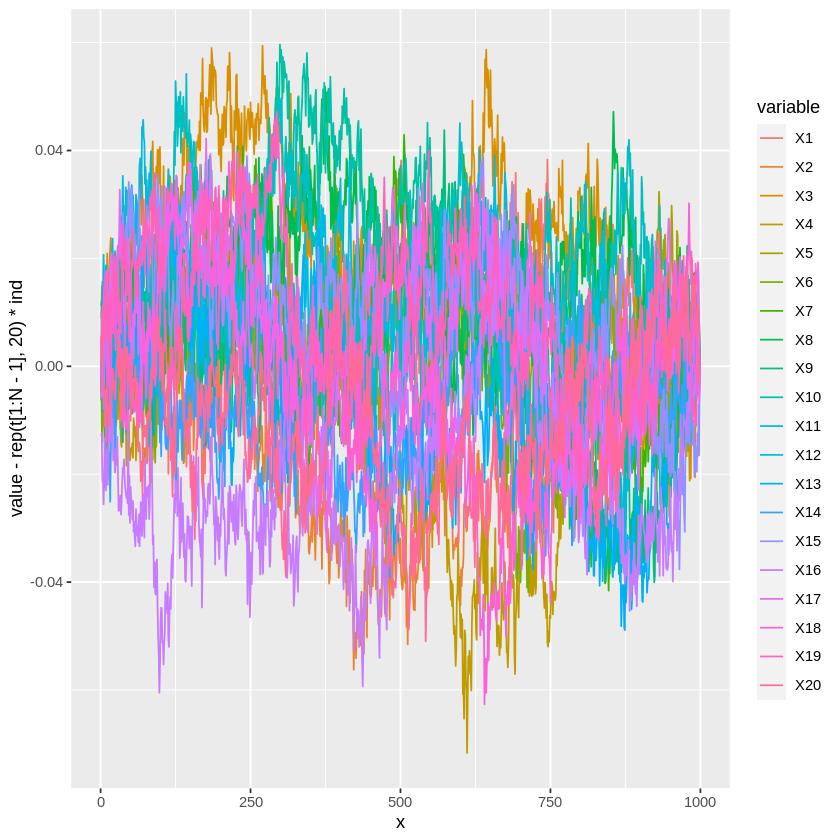

In [ ]:
#######################
#                     #
#  MANY TRAYECTORIES  #
#                     #
#######################

# Movimiento browniano
set.seed(2)

# Grid
# H=1/4
I=0#Initial point
F=1#Final point
H<-1/4
sig<-1
N<-1000
dt<-(F-I)/N
t<-seq(I,F,length=N)#Domain
p <- length(t) - 1
C<-matrix(0,N-1,N-1)
for (i in 2:N) {
  for (j in 2:N) {
    C[i-1,j-1] <- (1/2)*((abs(t[i])^(2*H) + abs(t[j])^(2*H) - abs(t[i]-t[j])^(2*H)))
  }
}
# 20 trayectorias
n <- 20
I <- matrix(rnorm((n-1) * p, 0, 1 / sqrt(p)), n, p)%*%chol(C)
# Data frame
df1 <- data.frame(t(I))

install.packages("reshape")
library(reshape)

df <- data.frame(x = seq_along(df1[, 1]),
                 df1)

# Formato long
df <- melt(df, id.vars = "x")

# install.packages("ggplot2")
library(ggplot2)
vf<-df$value[(N-1)*(1:n)]
ind<-c()
for(i in 1:20){
  ind<-c(ind,rep(vf[i],N-1))
}
ggplot(df, aes(x = x, y = value-rep(t[1:N-1],20)*ind, color = variable)) +
  geom_line()


# Fractional brownian bridge with H=3/4

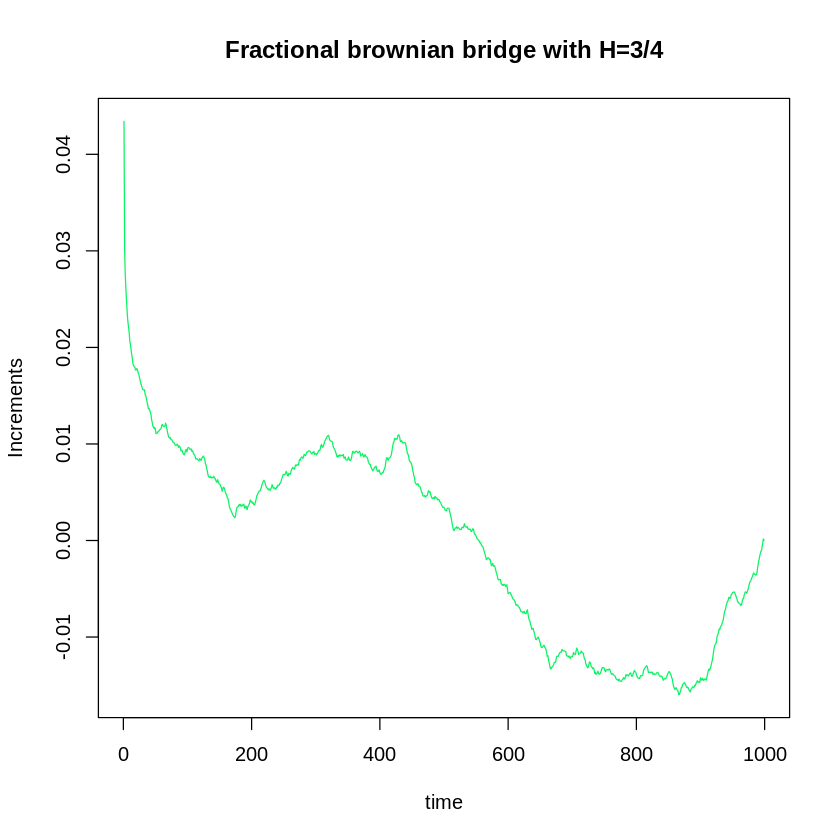

In [ ]:
#################################
#                               #
#                               #
#       Black Noise H=3/4       #
#         Bridge                #
#                               #
#                               #
#################################
# H=1/6
I=0#Initial point
F=1#Final point
H<-3/4
sig<-1
N<-1000
dt<-(F-I)/N
t<-seq(I,F,length=N)#Domain
C<-matrix(0,N-1,N-1)
for (i in 2:N) {
  for (j in 2:N) {
    C[i-1,j-1] <- (1/2)*((abs(t[i])^(2*H) + abs(t[j])^(2*H) - abs(t[i]-t[j])^(2*H)))
  }
}




########################
# generate Motion      #
########################

z<-rnorm(N-1,0,sig*sqrt(dt))
BH<-chol(C)%*%z
plot(BH-t[2:N-1]*BH[length(BH)],type = "l",main="Fractional brownian bridge with H=3/4",col="#0AF362",
     xlab="time",ylab = "Increments")

Warning message in matrix(rnorm((n - 1) * p, 0, 1/sqrt(p)), n, p):
“data length [18981] is not a sub-multiple or multiple of the number of rows [20]”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



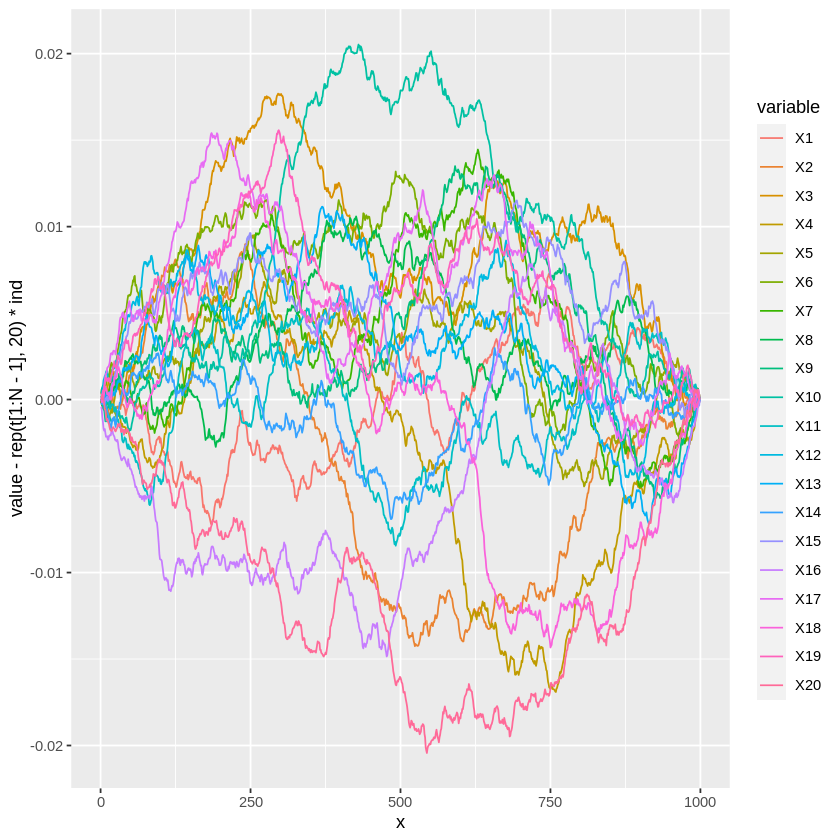

In [ ]:
#######################
#                     #
#  MANY TRAYECTORIES  #
#                     #
#######################

# Movimiento browniano
set.seed(2)

# Grid
# H=3/4
I=0#Initial point
F=1#Final point
H<-3/4
sig<-1
N<-1000
dt<-(F-I)/N
t<-seq(I,F,length=N)#Domain
p <- length(t) - 1
C<-matrix(0,N-1,N-1)
for (i in 2:N) {
  for (j in 2:N) {
    C[i-1,j-1] <- (1/2)*((abs(t[i])^(2*H) + abs(t[j])^(2*H) - abs(t[i]-t[j])^(2*H)))
  }
}
# 20 trayectorias
n <- 20
I <- matrix(rnorm((n-1) * p, 0, 1 / sqrt(p)), n, p)%*%chol(C)
# Data frame
df1 <- data.frame(t(I))

install.packages("reshape")
library(reshape)

df <- data.frame(x = seq_along(df1[, 1]),
                 df1)

# Formato long
df <- melt(df, id.vars = "x")

# install.packages("ggplot2")
library(ggplot2)
vf<-df$value[(N-1)*(1:n)]
ind<-c()
for(i in 1:20){
  ind<-c(ind,rep(vf[i],N-1))
}
ggplot(df, aes(x = x, y = value-rep(t[1:N-1],20)*ind, color = variable)) +
  geom_line()

# How to estimate the parameters

## Blanco and Arunachalam

In classical SDE we estimate the mean and deviation of logarithmic Returns, but in fractional SDE we need to use Cholesky method for example

# How to estimate H



0.001607351,0.002120912,0.002424304,0.002659256,0.002856154
0.002120912,0.004241825,0.005058778,0.005597121,0.006028972
0.002424304,0.005058778,0.007483082,0.008534987,0.009270229
0.002659256,0.005597121,0.008534987,0.011194243,0.012443046
0.002856154,0.006028972,0.009270229,0.012443046,0.015299200


[1] 0.6456790 0.5051980 0.4823833 0.4619201 0.4425686

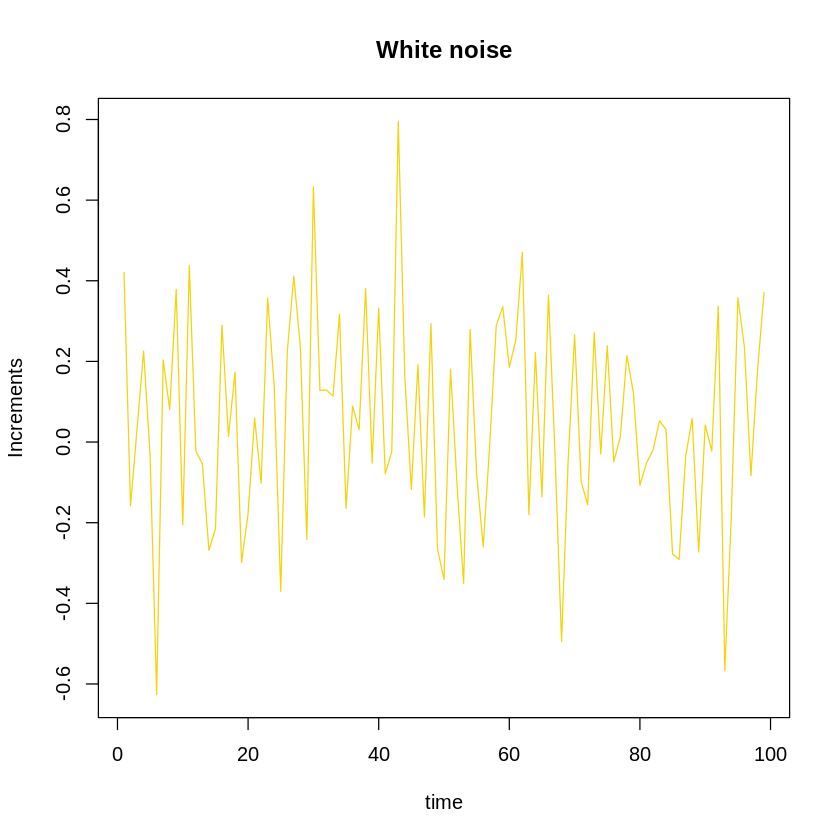

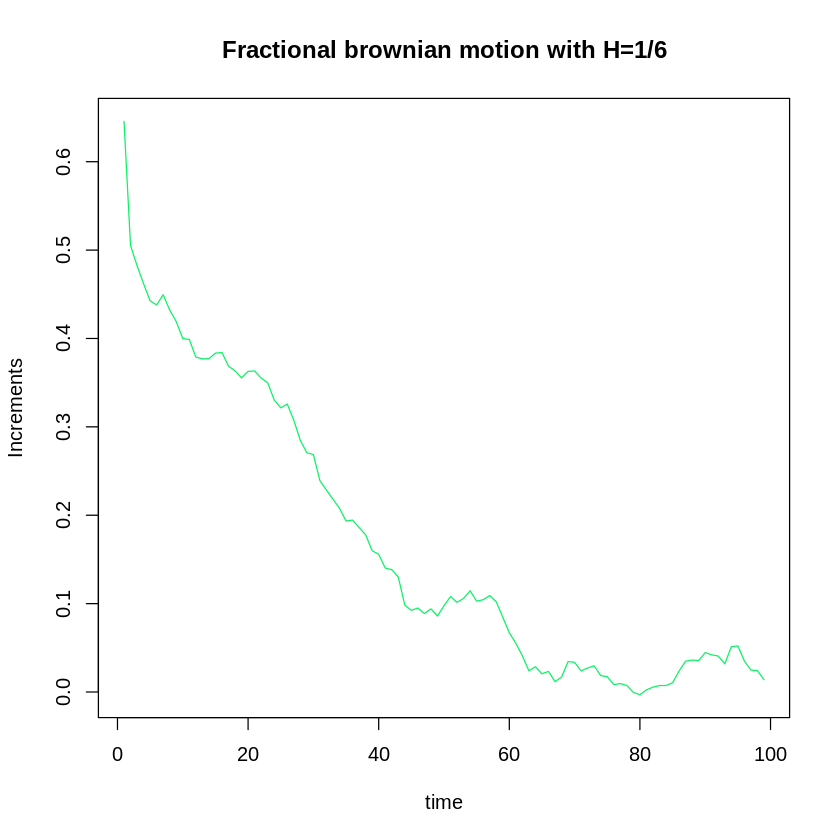

In [ ]:
# H=1/6
I=0#Initial point
F=1#Final point
H<-0.7
sig<-3
N<-100
dt<-(F-I)/N
t<-seq(I,F,length=N)#Domain
C<-matrix(0,N-1,N-1)
for (i in 2:N) {
  for (j in 2:N) {
   C[i-1,j-1] <- (1/2)*((abs(t[i])^(2*H) + abs(t[j])^(2*H) - abs(t[i]-t[j])^(2*H)))
  }
}
C[1:5,1:5]




########################
# generate Motion      #
########################

z<-rnorm(N-1,0,sig*sqrt(dt))
plot(z,type = "l",main="White noise",col="#F3D30A",
     xlab="time",ylab = "Increments")
BH<-chol(C)%*%z
BH[1:5]
plot(BH,type = "l",main="Fractional brownian motion with H=1/6",col="#0AF362",
     xlab="time",ylab = "Increments")



In [ ]:
# ESTIMATION H

num<-20
h<-seq(0.01,0.99,length=num)
pval<-c()
for(H in h){
  sig<-0
  C<-matrix(0,N-1,N-1)
  for (i in 2:N) {
    for (j in 2:N) {
      C[i-1,j-1] <- (1/2)*((abs(t[i])^(2*H) + abs(t[j])^(2*H) - abs(t[i]-t[j])^(2*H)))
    }
  }
  z<-solve(chol(C))%*%BH
 pval<-c(pval,ks.test(z,"pnorm",0,sd(z))[[2]])
}

pval



[1] 1.029233e-10 5.587153e-11 1.861374e-09 5.804750e-09 3.650534e-08
 [6] 5.034665e-10 4.845367e-09 2.940275e-07 5.773029e-07 9.737294e-07
[11] 5.977672e-06 6.456383e-05 3.468484e-03 2.037569e-01 3.939312e-01
[16] 4.824507e-02 2.786238e-05 7.757198e-09 1.365574e-11 1.609823e-14

[1] 0.6805263 0.7321053 0.7836842

In [ ]:
h[pval>0.01]

[1] 0.6805263 0.7321053 0.7836842

### Conclusions

- Capturing Long-Range Dependence: fBm is a type of stochastic process that exhibits long-range dependence, meaning that its increments are correlated over long time scales. This property can be useful in modeling real-world phenomena that exhibit long-term memory or persistence, such as financial markets or climate data. SDEs with fBm as the driving noise can provide a way to model such systems.

- Flexibility: SDEs with fBm allow for a high degree of flexibility in modeling various processes. fBm can be used to model a wide range of phenomena, including turbulence, spatial processes, and biological systems, among others. By incorporating fBm into SDEs, researchers can create models that are tailored to specific applications and that capture the dynamics of the system under study.

- Non-Markovian Dynamics: SDEs with fBm driving noise are non-Markovian, meaning that the future behavior of the process is influenced by its entire past trajectory, not just its most recent state. This property can be useful in modeling systems where memory effects are important, such as diffusion processes in heterogeneous media or transport processes in porous materials.

- Statistical Properties: fBm is a self-similar process, meaning that it exhibits statistical properties that are invariant under rescaling. This property can be useful in modeling systems where the underlying dynamics exhibit scale invariance, such as in fractal geometry or in critical phenomena.

- Numerical Simulations: SDEs with fBm driving noise can be simulated numerically using efficient algorithms, such as the Euler-Maruyama or Milstein schemes. This makes it possible to study the behavior of the model over long time scales or in high-dimensional systems, which would be difficult or impossible to do analytically.